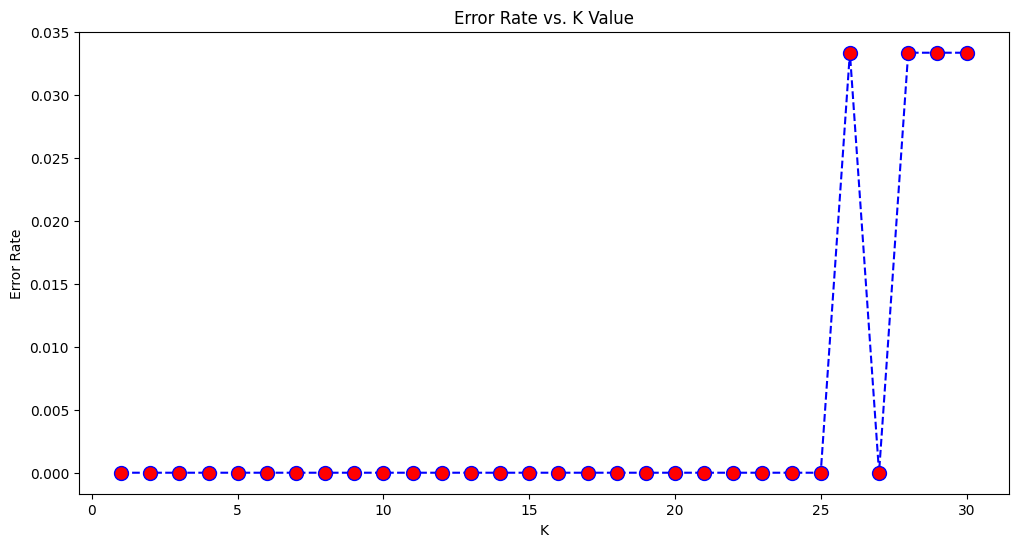

Optimal K value: 1


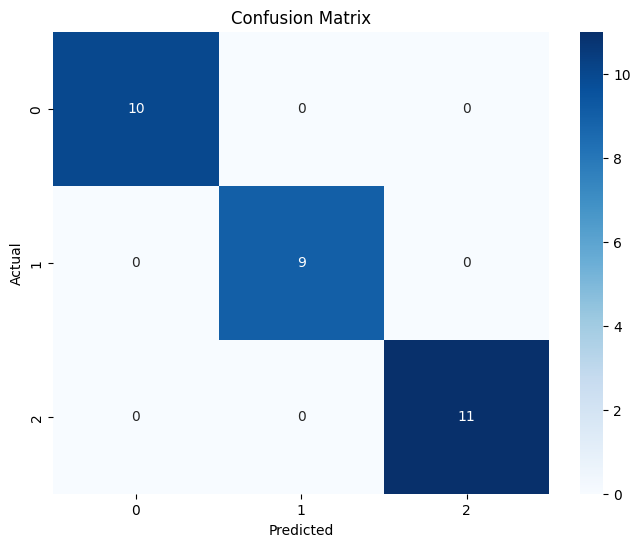


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy Score: 1.0


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/iris.csv')

# Display first few rows
df.head()

# Separate features and labels
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find the best k value by plotting error rates
error_rate = []

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting error rates
plt.figure(figsize=(12,6))
plt.plot(range(1,31), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Choose k with minimum error
optimal_k = error_rate.index(min(error_rate)) + 1
print(f"Optimal K value: {optimal_k}")

# Train the model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
class_report = classification_report(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print("\nClassification Report:\n", class_report)
print("\nAccuracy Score:", acc_score)


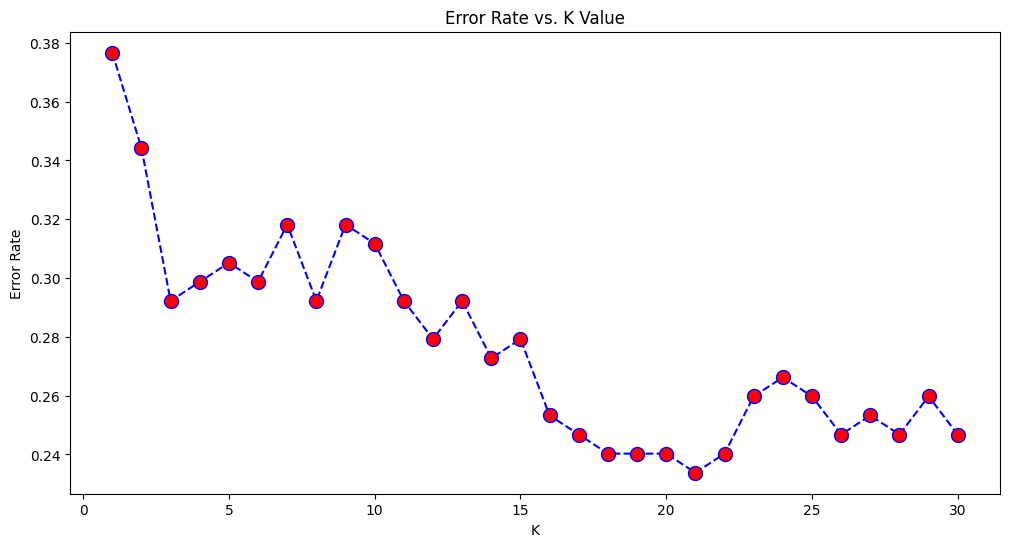

Optimal K value: 21


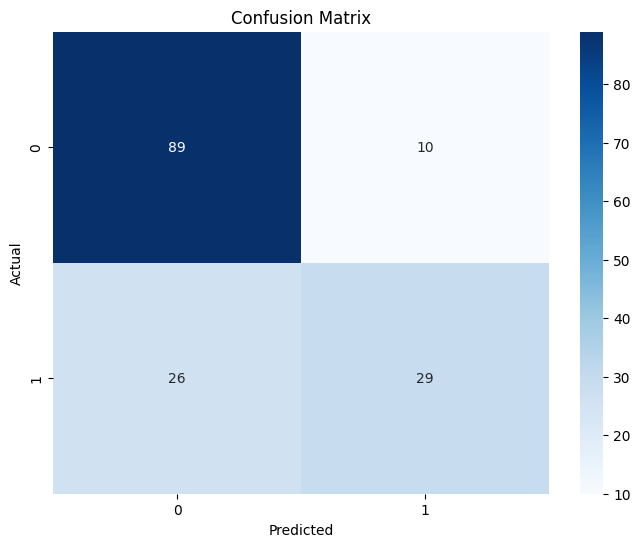


Accuracy Score: 0.7662337662337663


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
diabetes_df = pd.read_csv('/content/diabetes.csv')

# Display first few rows
diabetes_df.head()

# Separate features and target
X = diabetes_df.drop('Outcome', axis=1)
# Assuming 'Outcome' is the target variable based on common diabetes datasets
y = diabetes_df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Finding the best k value
error_rate = []

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting error rates
plt.figure(figsize=(12,6))
plt.plot(range(1,31), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Choose optimal k
optimal_k = error_rate.index(min(error_rate)) + 1
print(f"Optimal K value: {optimal_k}")

# Train the model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
acc_score = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", acc_score)


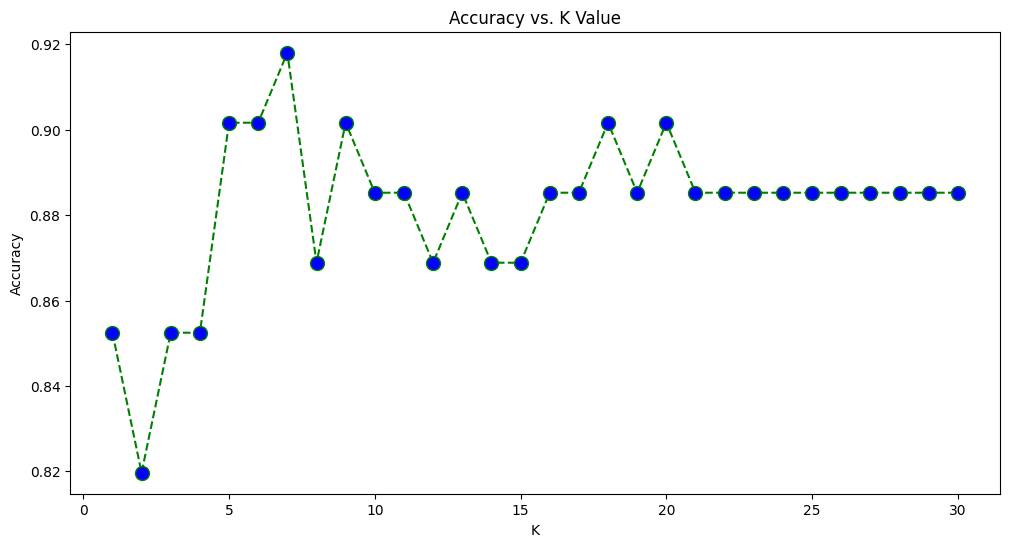

Optimal K value: 7


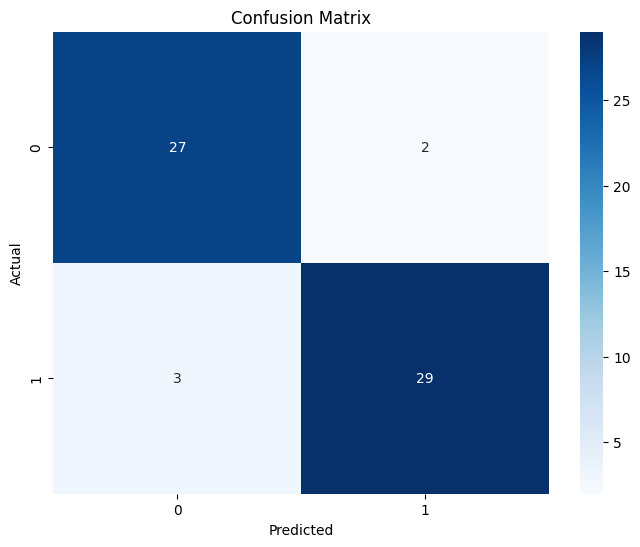

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


Accuracy Score: 0.9180327868852459


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# Load the dataset
heart_df = pd.read_csv('/content/heart.csv')

# Display first few rows
heart_df.head()

# Separate features and target
X = heart_df.drop('target', axis=1)
y = heart_df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find the best k value
error_rate = []
acc_scores = []

for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc_scores.append(accuracy_score(y_test, pred_i))
    error_rate.append(np.mean(pred_i != y_test))

# Plotting Accuracy vs K Value
plt.figure(figsize=(12,6))
plt.plot(range(1,31), acc_scores, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

# Choose k with maximum accuracy
optimal_k = acc_scores.index(max(acc_scores)) + 1
print(f"Optimal K value: {optimal_k}")

# Train the model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict the test set results
y_pred = knn.predict(X_test)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Print accuracy score
acc_score = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", acc_score)
